# Factorization Machines

<span style="font-size:1.2em;">This notebook contains the process and progress of understanding factorization machines. The contents in this notebook can be found as follows:
1. Introduction and Concepts
2. Managing Dataset for FM Format
</span>

# 1. Introduction

<div style="font-size:1.2em;">Some of its features are:
    
* allows parameter estimation under sparse data
* works with **real valued feature vector** ?
* Use feature vectors as input data
    * Related to specialized SOTA factorization models

Scoring functions learned with pairwise training data? 
</div>

## Model

<span style="font-size:1.2em">
    
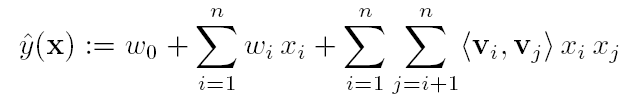

where,
* $ w_0 $ is the global bias
* $ w_i $ models strenght of $i-th $ variable

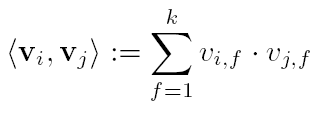

where,

* row $v_i$ within V describes i-th variable with ***k*** factors  

### FM models the interaction by factorizing it

- A FM can express any interaction matrix if k is chosen large enough,
    - but small k is favourable for sparse settings
 
## Losses in FM 

* Square loss
* Logit Loss
* Hinge Loss

Model parameters can be learnt with gradient descent methods(SGD)
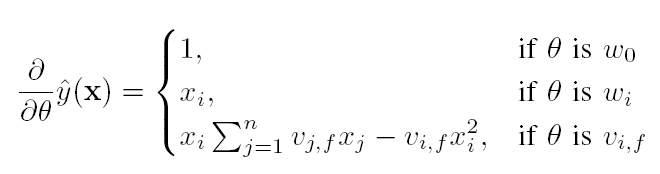
</span>

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 

In [7]:
import torch.nn as nn
import torch

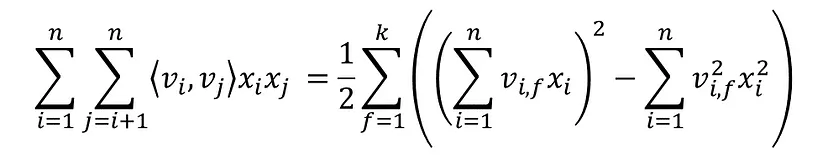

In [10]:
class FM(nn.Module):
    """ Factorization Machine
    """
    def __init__(self, num_feats, emb_dim, init):
        super().__init__()
        self.x_emb = nn.Embedding(num_feats, emb_dim)
        if init:
            self.x_emb.weight.data.uniform_(0., 0.05)

    def forward(self, X):
        x_emb = self.x_emb(X) # [bs, num_feats] -> [bs, num_feats, emb_dim]
        pow_of_sum = x_emb.sum(dim=1).pow(2) # -> [bs, num_feats]
        sum_of_pow = x_emb.pow(2).sum(dim=1) # -> [bs, num_feats]
        fm_out = (pow_of_sum - sum_of_pow).sum(1)*0.5  # -> [bs]
        return fm_out

In [11]:
movies_df = pd.read_csv('../../movie_dataset/movies_metadata.csv', low_memory=False)
ratings_df = pd.read_csv('../../movie_dataset/ratings_small.csv', low_memory=False)
print(ratings_df.head(2))
movies_df.head(2)

   userId  movieId  rating   timestamp
0       1       31     2.5  1260759144
1       1     1029     3.0  1260759179


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


## Difference between matrix factorization and factorization machine

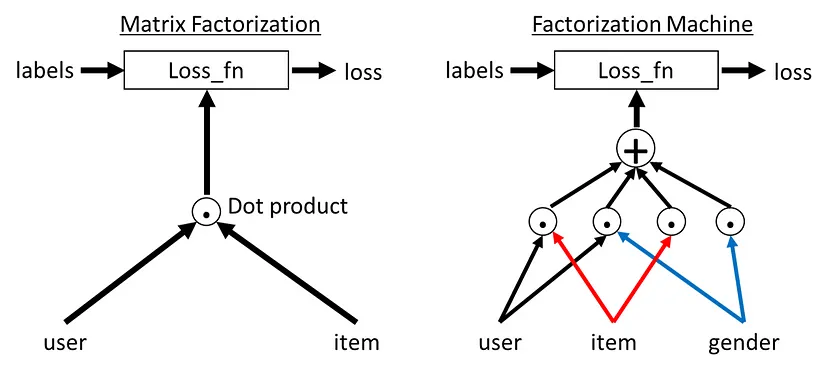

# 2. Managing Dataset for FM Format
<div style="font-size:1.2em;">

* Getting appropriate feature columns to add 

</div>

In [13]:
ratings_df.columns

Index(['userId', 'movieId', 'rating', 'timestamp'], dtype='object')

In [14]:
# getting users' gender? 
users_df = pd.read_csv('../../movie_dataset/credits.csv')
users_df.head(2)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
